# Raw Extraction of required data 

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [1]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [7]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

In [3]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year, iso=True):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        if iso:
            cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        else:
            cal = datetime.strptime(date, "%d-%m-%Y")
        date_calculation_cache[date] = cal
    else:
        cal = date_calculation_cache[date]
    return cal

In [5]:
# Initialise a dictionary to hold all our data.
# We will later convert this into a pandas dataframe for easy processing
ip_attacks = {}
for attk in indexes:
    ip_attacks[attk] = {}
ip_total_set = set([])

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        #continue
        files.append(('./../../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    cal = make_date(day, month, year, iso=False)
                    year_num, week_num, weekday_num = cal.isocalendar()

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue

                # Relabelling unlabelled reports
                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Initialise the ip holder
                if ip not in ip_attacks[attack_label]:
                    ip_attacks[attack_label][ip] = 0

                # Modify the ip,year value
                ip_attacks[attack_label][ip] += 1
                ######

                ip_total_set.add(ip)

print('Finished')

6918it [00:00, 54496.85it/s]
0it [00:00, ?it/s]

Spammers
./../../Datastore/Spammers_reports.csv
Malware
./../../Datastore/Malware_reports.csv


3190529it [00:25, 125700.69it/s]
14364it [00:00, 143588.44it/s]

Exploits
./../../Datastore/Exploits_reports.csv


201108it [00:01, 136564.50it/s]
10636it [00:00, 106302.57it/s]

Phishing
./../../Datastore/Phishing_reports.csv


2382889it [00:18, 127925.35it/s]
9710it [00:00, 97066.07it/s]

Fraudlent Services
./../../Datastore/Fraudlent Services_reports.csv


829301it [00:06, 130674.79it/s]
12804it [00:00, 128007.77it/s]

Unwanted Programs
./../../Datastore/Unwanted Programs_reports.csv


698700it [00:05, 127892.22it/s]


Unlabelled
./../../Datastore/Unlabelled_reports_0.csv


/Users/zha197/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
2000138it [00:15, 127164.33it/s]


./../../Datastore/Unlabelled_reports_1.csv


2000007it [00:16, 122930.56it/s]


./../../Datastore/Unlabelled_reports_2.csv


2000047it [00:15, 130351.55it/s]


./../../Datastore/Unlabelled_reports_3.csv


2000022it [00:14, 141643.99it/s]


./../../Datastore/Unlabelled_reports_4.csv


2000471it [00:14, 136970.74it/s]


./../../Datastore/Unlabelled_reports_5.csv


2000567it [00:15, 125979.82it/s]


./../../Datastore/Unlabelled_reports_6.csv


2000130it [00:16, 121163.99it/s]


./../../Datastore/Unlabelled_reports_7.csv


2000541it [00:16, 123114.75it/s]


./../../Datastore/Unlabelled_reports_8.csv


2000282it [00:15, 133273.21it/s]


./../../Datastore/Unlabelled_reports_9.csv


2000016it [00:14, 135956.04it/s]


./../../Datastore/Unlabelled_reports_10.csv


2000165it [00:13, 144198.87it/s]


./../../Datastore/Unlabelled_reports_11.csv


2000021it [00:13, 149769.72it/s]


./../../Datastore/Unlabelled_reports_12.csv


2000114it [00:13, 147473.96it/s]


./../../Datastore/Unlabelled_reports_13.csv


2000038it [00:14, 133425.42it/s]


./../../Datastore/Unlabelled_reports_14.csv


2000304it [00:14, 139695.52it/s]


./../../Datastore/Unlabelled_reports_15.csv


2000019it [00:14, 140262.39it/s]


./../../Datastore/Unlabelled_reports_16.csv


2000455it [00:18, 108458.38it/s]


./../../Datastore/Unlabelled_reports_17.csv


2000040it [00:17, 113285.87it/s]


./../../Datastore/Unlabelled_reports_18.csv


2000023it [00:14, 136017.92it/s]


./../../Datastore/Unlabelled_reports_19.csv


2000058it [00:14, 140980.14it/s]


./../../Datastore/Unlabelled_reports_20.csv


2000016it [00:15, 131413.99it/s]


./../../Datastore/Unlabelled_reports_21.csv


2000294it [00:14, 137491.36it/s]
0it [00:00, ?it/s]

./../../Datastore/Unlabelled_reports_22.csv


332782it [00:02, 138260.57it/s]

Finished


In [7]:
# Turn into a pandas array
ip_attack_frame = pd.DataFrame.from_dict(ip_attacks, orient='index')
ip_attack_frame = ip_attack_frame.transpose()
ip_attack_frame = ip_attack_frame.fillna(0)

In [8]:
# Save the DataFrame
ip_attack_frame.to_csv('ip_attack_frame.csv')

# Plotting code

## Import precomputed data

In [1]:
import pandas as pd
ip_attack_frame = pd.read_csv('ip_attack_frame.csv', index_col=0)

## Top offending IPs

In [3]:
if 'Totals' in ip_attack_frame:
    ip_attack_frame.drop('Totals', axis=1,inplace=True)

ip_attack_frame['Totals'] = ip_attack_frame.transpose().sum()

ip_attack_frame[['Totals','Malware','Phishing','Spammers',
                 'Unwanted Programs','Exploits','Fraudlent Services']
               ].sort_values('Totals', ascending=False).head(10)

,Totals,Malware,Phishing,Spammers,Unwanted Programs,Exploits,Fraudlent Services
54.72.9.51,43753.0,37753.0,561.0,7.0,505.0,437.0,4490.0
52.85.131.141,36710.0,36033.0,0.0,0.0,336.0,0.0,341.0
69.172.216.56,35886.0,0.0,1.0,0.0,35885.0,0.0,0.0
52.84.0.64,35777.0,35520.0,183.0,0.0,51.0,10.0,13.0
52.84.0.252,35711.0,35441.0,203.0,0.0,40.0,21.0,6.0
52.84.0.35,35705.0,35529.0,83.0,0.0,55.0,31.0,7.0
54.230.6.60,35691.0,35661.0,18.0,0.0,11.0,1.0,0.0
52.84.0.188,35618.0,35400.0,164.0,0.0,50.0,0.0,4.0
52.85.131.53,35588.0,35587.0,0.0,0.0,0.0,0.0,1.0
52.84.0.62,35570.0,35217.0,291.0,0.0,52.0,6.0,4.0


## Unique IP Summary

In [8]:
a = ip_attack_frame.drop('Totals',axis=1)
a = a.transpose().sum()
a = a[a > 0]
labelled_len = len(a)
full_len = len(ip_attack_frame)

print '%20s:%10s: %7s: %6s'%('Attack','Unique','Ratio','%')

# Attack Label
for attk in indexes:
    if attk == 'Unlabelled':
        continue
    attk_len = len(ip_attack_frame[attk][ip_attack_frame[attk]>0])
    ratio = 1.0*attk_len/labelled_len
    percent = ratio*100.0
    print '%20s:%10s: %0.5f: %6.2f'%(attk,attk_len,ratio,percent)

# Labelled
ratio = 1.0*labelled_len/full_len
percent = ratio*100.0
print '%20s:%10s: %0.5f:% 6.2f'%('Labelled',labelled_len,ratio,percent)
    
print '%20s:%10s: %0.5f:% 6.2f'%('Totals',full_len,1.0,100.0)

              Attack:    Unique:   Ratio:      %
            Spammers:      2209: 0.00333:   0.33
             Malware:    427745: 0.64574:  64.57
            Exploits:     39854: 0.06017:   6.02
            Phishing:    133072: 0.20089:  20.09
  Fraudlent Services:     87508: 0.13211:  13.21
   Unwanted Programs:    165465: 0.24979:  24.98
            Labelled:    662409: 1.00000: 100.00
              Totals:    662409: 1.00000: 100.00


## Graph Plotting Parameters

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil.relativedelta

plot_properties_indexes = {
    'Unwanted Programs':{'color':'b', 'linestyle':'-', 'label':'PUP',
                         'marker':'s', 'hatch':'//'},

    'Fraudlent Services':{'color':'y', 'linestyle':'-', 'label':'Fraud. Serv.',
                          'marker':'*','hatch':'\\'},

    'Malware':{'color':'r', 'linestyle':'-', 'label':'Malware',
               'marker':'x', 'hatch':'x'},

    'Exploits':{'color':'m', 'linestyle':'-', 'label':'Exploits',
                'marker':'+', 'hatch':'+'},

    'Phishing':{'color':'g', 'linestyle':'-', 'label':'Phishing',
                'marker':'^', 'hatch':'|'},

    'Spammers':{'color':'c', 'linestyle':'-', 'label':'Spammers',
                'marker':'D', 'hatch':'\\\\'},

    'Unlabelled':{'color':'w', 'linestyle':'-', 'label':'Unlabelled',
                  'marker':'T', 'hatch':'///'},

    'Totals':{'color':'k', 'linestyle':'-', 'label':'Total',
              'marker':'o', 'hatch':''}
}

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cPickle

def cdf(data, m,n,s,lstring):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)
    #new_bins = [bins[i] for i in range(len(bins)) if (i/5)%5==0]
    #print len(bins)
    #print len(new_bins)
    

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    #print counts
    #print bin_edges
    counts=counts.astype(float)/data_size

    markers_on = bins[0]
    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='%s'%n, color='%s'%m,marker='%s'%s,markevery=0.1, label=lstring)    
    plt.ylim((0,1))

## CDF of IP Reports

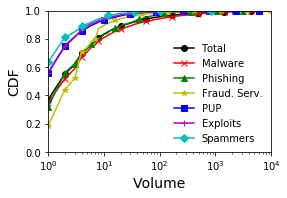

In [11]:
a = ip_attack_frame.drop('Totals',axis=1)
if 'Totals' in a:
    a.drop('Totals', axis=1,inplace=True)

a['Totals'] = a.transpose().sum()
a = a[a['Totals']>0]
final_df = a
    
plt.figure(figsize=(4,2.6))

for attk in ['Totals', 'Malware', 'Phishing', 'Fraudlent Services', 'Unwanted Programs', 
             'Exploits', 'Spammers']:
    a = final_df[attk][final_df[attk]!=0]
    linestyle = plot_properties_indexes[attk]['linestyle']
    color = plot_properties_indexes[attk]['color']
    label = plot_properties_indexes[attk]['label']
    marker = plot_properties_indexes[attk]['marker']
    
    cdf(a, color, linestyle, marker, label)

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Volume",fontsize=14)

plt.xscale('log')
plt.xlim(1, 10000)
plt.ylim(0)
plt.legend(loc='lower right', frameon=False)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/ip_attack_cdf.pdf",bbox_inches='tight')
plt.show()

# Additional Analysis

In [59]:
# Top 10 IPs with total number of reports
final_df[['Totals','Malware','Phishing','Spammers','Unwanted Programs','Exploits','Fraudlent Services']].sort_values('Totals', ascending=False).head(10)

,Totals,Malware,Phishing,Spammers,Unwanted Programs,Exploits,Fraudlent Services
54.72.9.51,43753.0,37753.0,561.0,7.0,505.0,437.0,4490.0
52.85.131.141,36710.0,36033.0,0.0,0.0,336.0,0.0,341.0
69.172.216.56,35886.0,0.0,1.0,0.0,35885.0,0.0,0.0
52.84.0.64,35777.0,35520.0,183.0,0.0,51.0,10.0,13.0
52.84.0.252,35711.0,35441.0,203.0,0.0,40.0,21.0,6.0
52.84.0.35,35705.0,35529.0,83.0,0.0,55.0,31.0,7.0
54.230.6.60,35691.0,35661.0,18.0,0.0,11.0,1.0,0.0
52.84.0.188,35618.0,35400.0,164.0,0.0,50.0,0.0,4.0
52.85.131.53,35588.0,35587.0,0.0,0.0,0.0,0.0,1.0
52.84.0.62,35570.0,35217.0,291.0,0.0,52.0,6.0,4.0


In [27]:
# Proportion of IPs with more than one report
for attk in indexes:
    if attk == 'Unlabelled':
        continue
    print('\n' + attk)
    over_1 = len(final_df[final_df[attk] > 1])
    total = len(final_df[final_df[attk] != 0])
    print(over_1)
    print(total)
    print(1.0*over_1/total)


Spammers
805
2209
0.364418288818

Malware
278093
427745
0.650137348186

Exploits
17660
39854
0.443117378431

Phishing
90411
133072
0.679414151737

Fraudlent Services
71394
87508
0.815856835946

Unwanted Programs
72537
165465
0.438382739552


In [31]:
# Proportion of IPs with more than 10 reports
attk = 'Totals'
print('\n' + attk)
over_1 = len(final_df[final_df[attk] > 9])
total = len(final_df[final_df[attk] != 0])
print(over_1)
print(total)
print(1.0*over_1/total)

print "Mean reports per IP"
print(final_df[attk].mean())


Totals
117935
662409
0.178039549583
Mean reports per IP
77.9669282875


In [34]:
# Check details of Most offensive IP
final_df.loc['54.72.9.51']

Exploits                437.0
Fraudlent Services     4490.0
Malware               37753.0
Phishing                561.0
Spammers                  7.0
Unwanted Programs       505.0
Totals                43753.0
Name: 54.72.9.51, dtype: float64

In [37]:
# Check details of Third offensive IP
final_df.loc['69.172.216.56']

Exploits                  0.0
Fraudlent Services        0.0
Malware                   0.0
Phishing                  1.0
Spammers                  0.0
Unwanted Programs     35885.0
Totals                35886.0
Name: 69.172.216.56, dtype: float64

In [58]:
# IPs participating in more than one class
a = (final_df.drop('Totals', axis=1) != 0).sum(axis=1)
more_than_1_class = len(a[a > 1])
total = len(a)

print(more_than_1_class)
print(total)
print(1.0*more_than_1_class/total)

136941
662409
0.206731792593
